# Data wrangling 


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = sns.load_dataset('titanic')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [45]:
df.isnull().sum() /len (df)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [46]:
df.drop(columns='deck', inplace=True)


In [47]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [48]:
df['age'] = df['age'].fillna(df['age'].mean())


In [49]:
df.isnull().sum() /len (df)*100

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.224467
class          0.000000
who            0.000000
adult_male     0.000000
embark_town    0.224467
alive          0.000000
alone          0.000000
dtype: float64

In [50]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode())

In [51]:
df.isnull().sum() /len (df)*100

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.224467
class          0.000000
who            0.000000
adult_male     0.000000
embark_town    0.224467
alive          0.000000
alone          0.000000
dtype: float64

In [52]:
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode())

In [53]:
df.isnull().sum() /len (df)*100

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.224467
class          0.000000
who            0.000000
adult_male     0.000000
embark_town    0.224467
alive          0.000000
alone          0.000000
dtype: float64

# outliers removal

# visualization wala method

In [54]:
import seaborn as sns

<Axes: xlabel='sex', ylabel='age'>

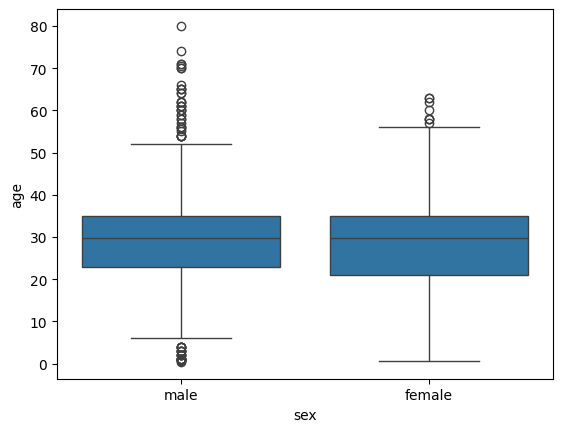

In [55]:
sns.boxplot(data=df, y='age',x='sex')

#IQR METHOD 
inter quartile range method

In [56]:
# Calculate Q1, Q3, and IQR
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
IQR
# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['age'] > lower_bound) & (df['age'] < upper_bound)]





In [57]:
df.shape

(825, 14)

In [58]:
# Calculate Q1, Q3, and IQR
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
IQR
# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['fare'] > lower_bound) & (df['fare'] < upper_bound)]





In [59]:
df.shape

(718, 14)

<Axes: xlabel='age', ylabel='Count'>

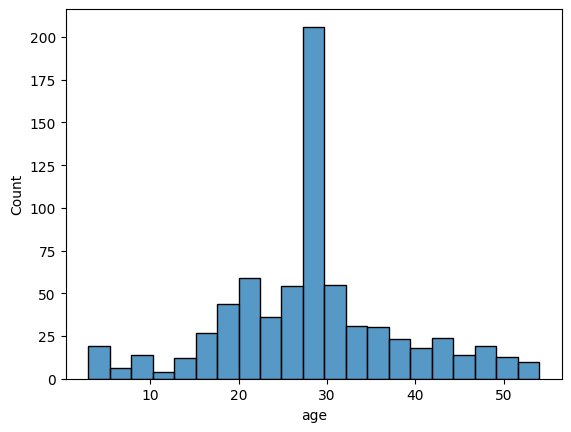

In [60]:
sns.histplot(df['age'])

In [ ]:
# # Zscore method
# from scipy import stats
# import numpy as np

# zscore = np.abs(stats.zscore(df['age']))
# threshold = 3
# df = df[(z < threshold).all(axis=1)]

NameError: name 'z' is not defined

In [ ]:
# from scipy import stats
# import numpy as np

# # Compute z-score for the 'age' column
# zscore = np.abs(stats.zscore(df['age']))

# # Define threshold for outlier detection
# threshold = 3

# # Keep only rows where z-score is less than the threshold
# df = df[zscore < threshold]
# #

# Finding and dropping duplicated

In [41]:
# finding and dropping duplicates
df.duplicated().sum()

np.int64(0)

In [64]:
df1_duplicates = df.duplicated()

In [66]:
df1_duplicates= df[df.duplicated()]
df1_duplicates.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
47,1,3,female,29.699118,0,0,7.7500,Q,Third,woman,False,Queenstown,yes,True
76,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,Southampton,no,True
77,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
87,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
95,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True


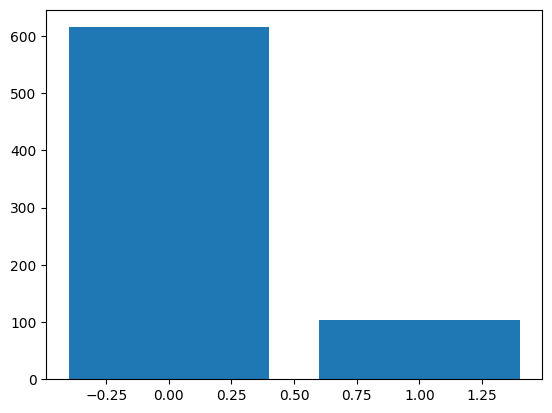

In [69]:
df_duplicates = df.duplicated()
df_duplicates_count = df_duplicates.value_counts()

plt.bar(df_duplicates_count.index, df_duplicates_count.values)
plt.show()

In [70]:
# finding and dropping duplicates
df.drop_duplicates(inplace=True)

In [71]:
df.shape

(615, 14)